Content
Currently, the dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

acceleration_x
acceleration_y
acceleration_z
gyro_x
gyro_y
gyro_z
There is an activity type represented by "activity" column which acts as label and reflects following activities:

"0": walking
"1": running
Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

"0": left wrist
"1": right wrist
Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("./walkrun.csv")
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [3]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [4]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

* no missing vaues

In [5]:
data.date.value_counts()

2017-7-16    20480
2017-7-17    11365
2017-7-6     11357
2017-7-15     7934
2017-7-9      7788
2017-7-11     6696
2017-7-10     4337
2017-7-1      4201
2017-6-30     3992
2017-7-2      3933
2017-7-7      3280
2017-7-4      3225
Name: date, dtype: int64

In [6]:
data.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

In [7]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [8]:
data[data.duplicated()]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z


In [9]:
data.head(3)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367


In [10]:
def duration_convert(time):
    # Split the time by ':' and extract hours, minutes, seconds, and milliseconds
    time_parts = time.split(':')
    
    # Extract hours, minutes, seconds, and milliseconds
    hours = int(time_parts[0])
    minutes = int(time_parts[1])
    
    # Convert the time to total seconds
    total_minutes = (hours * 60) + (minutes)
    
    
    # Format the duration as 'mm'
    formatted_duration = '{:02d}'.format(total_minutes)
    
    return formatted_duration

# Apply the duration_convert function to the 'time' column and create a new 'duration' column
data['time'] = data['time'].apply(duration_convert)

In [11]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,831,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,831,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,831,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,831,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,831,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,1209,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,1209,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,1209,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,1209,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [12]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

data['Day']=data["date"].dt.day #dt is to get access of the column 03-24 
data['Month']=data["date"].dt.month
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Day,Month
0,2017-06-30,831,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,30,6
1,2017-06-30,831,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,30,6
2,2017-06-30,831,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,30,6
3,2017-06-30,831,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,30,6
4,2017-06-30,831,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,30,6


In [13]:
data.drop('date',axis=True, inplace=True)
data.head(2)

,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Day,Month
0,831,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,30,6
1,831,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,30,6


In [14]:
data.Day.value_counts()

16    20480
17    11365
6     11357
15     7934
9      7788
11     6696
10     4337
1      4201
30     3992
2      3933
7      3280
4      3225
Name: Day, dtype: int64

In [15]:
df=data.copy()

In [16]:
df.head(2)

,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Day,Month
0,831,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,30,6
1,831,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,30,6


In [17]:
df.activity=df.activity.map({0:'Walking',1:'Running'})
df.wrist=df.wrist.map({0:'Left',1:'Right'})

In [18]:
df

,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Day,Month
0,831,viktor,Left,Walking,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,30,6
1,831,viktor,Left,Walking,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,30,6
2,831,viktor,Left,Walking,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,30,6
3,831,viktor,Left,Walking,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,30,6
4,831,viktor,Left,Walking,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...
88583,1209,viktor,Left,Walking,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,9,7
88584,1209,viktor,Left,Walking,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,9,7
88585,1209,viktor,Left,Walking,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,9,7
88586,1209,viktor,Left,Walking,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,9,7


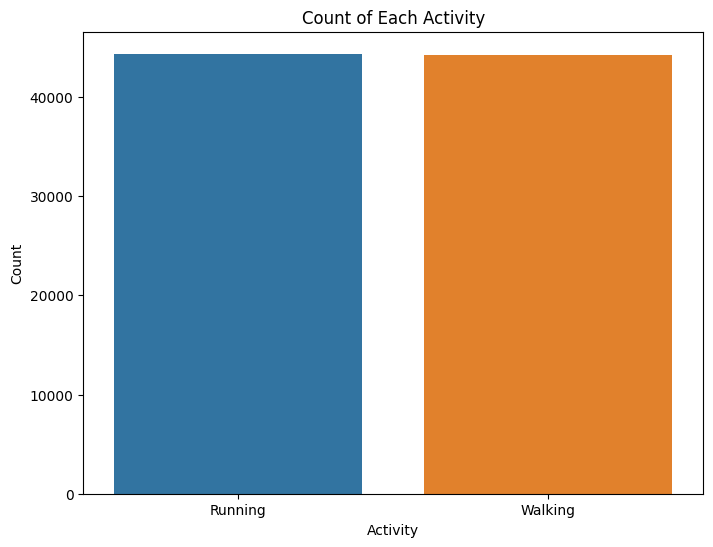

In [19]:
# Count the occurrences of each activity
activity_counts = df['activity'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Count of Each Activity')
plt.show()

<AxesSubplot: xlabel='count', ylabel='wrist'>

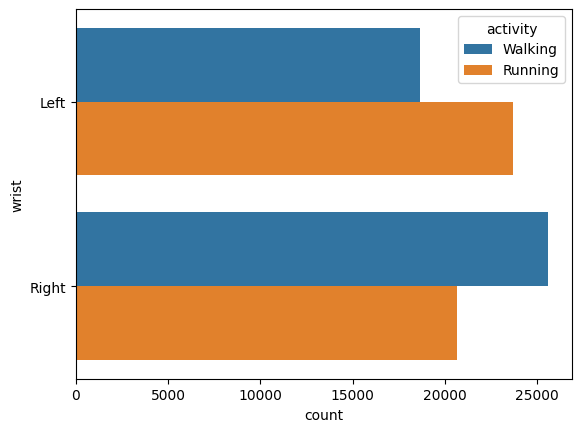

In [20]:
sns.countplot(y=df['wrist'],hue=df['activity'])

* The magnitude of the total acceleration is the square root of the sum of the squared components

In [21]:
# Calculate the total acceleration magnitude
data['total_acceleration'] = np.sqrt((data.acceleration_x)**2 + (data.acceleration_y)**2 + (data.acceleration_z)**2)
activity_data = data.groupby([df.activity])['total_acceleration'].agg({'mean','max'})


* This line calculates the total acceleration magnitude for each row in the DataFrame df. It computes the Euclidean norm (square root of the sum of squares) of the accelerometer data in the X (acceleration_x), Y (acceleration_y), and Z (acceleration_z) axes. The result is stored in a new column named 'total_acceleration'.

In [22]:
activity_data

,max,mean
activity,,
Running,5.737757,1.451963
Walking,2.182478,1.076322


In [23]:
data.head(2)

,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Day,Month,total_acceleration
0,831,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,30,6,0.825148
1,831,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,30,6,1.329887


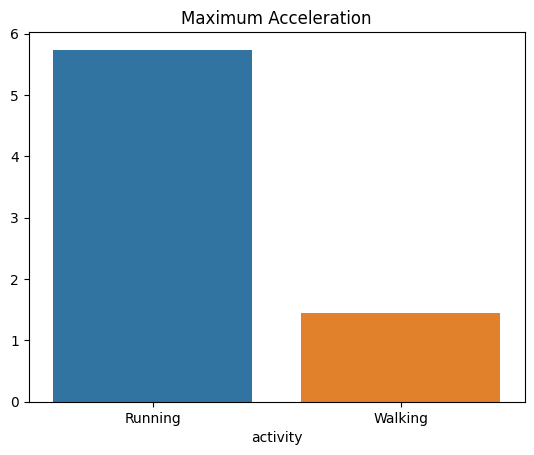

In [24]:
sns.barplot(y=activity_data.max(),x=activity_data.index)
plt.title('Maximum Acceleration')
plt.show()

In [25]:
data.drop('username',axis=1,inplace=True)

In [26]:
data.head(1)

,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Day,Month,total_acceleration
0,831,0,0,0.265,-0.7814,-0.0076,-0.059,0.0325,-2.9296,30,6,0.825148


In [27]:
x=data.drop('activity',axis=1)
y=data[['activity']]

In [28]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
data1=scaling.fit_transform(x)
x

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Day,Month,total_acceleration
0,831,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,30,6,0.825148
1,831,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,30,6,1.329887
2,831,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,30,6,1.547307
3,831,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,30,6,0.871729
4,831,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,30,6,1.048889
...,...,...,...,...,...,...,...,...,...,...,...
88583,1209,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,9,7,0.902382
88584,1209,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,9,7,1.202684
88585,1209,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,9,7,1.295380
88586,1209,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,9,7,0.899638


In [29]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [30]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((62011, 11), (26577, 11), (62011, 1), (26577, 1))

In [31]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression =LogisticRegression()
Logistic_Regression.fit(x_train,y_train)
y_pred=Logistic_Regression.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))

print("Classification Report: ")
print(classification_report(y_test,y_pred))

Logistic_Regression_accuracy_score = accuracy_score(y_test,y_pred)
print("Logistic Regression Accuracy Score: ",Logistic_Regression_accuracy_score)

Confusion Matrix: 
[[12745   688]
 [  405 12739]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     13433
           1       0.95      0.97      0.96     13144

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577

Logistic Regression Accuracy Score:  0.9588742145464123


In [48]:


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming x_train, x_test, y_train, y_test are defined and populated
# Replace with your actual training and testing data

# Initialize the SVM model
svc = SVC()

# Train the model
svc.fit(x_train, y_train)

# Predict on the test set
svc_y_pred = svc.predict(x_test)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_y_pred))

print("\nClassification Report:")
print(classification_report(y_test, svc_y_pred))

# Calculate and print accuracy score
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print("\nSVM Accuracy Score:", svc_accuracy)


Confusion Matrix:
[[12151  1282]
 [    0 13144]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     13433
           1       0.91      1.00      0.95     13144

    accuracy                           0.95     26577
   macro avg       0.96      0.95      0.95     26577
weighted avg       0.96      0.95      0.95     26577


SVM Accuracy Score: 0.9517628024231478


In [34]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier_model=DecisionTreeClassifier() 

DecisionTreeClassifier_model.fit(x_train, y_train)

DT_y_pred=DecisionTreeClassifier_model.predict(x_test)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, DT_y_pred))

print("\nClassification Report:")
print(classification_report(y_test, DT_y_pred))

# Calculate and print accuracy score
DecisionTreeClassifier_accuracy = accuracy_score(y_test, DT_y_pred)
print("\nDecision Tree Accuracy Score:", DecisionTreeClassifier_accuracy)

Confusion Matrix:
[[13366    67]
 [   48 13096]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13433
           1       0.99      1.00      1.00     13144

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577


Decision Tree Accuracy Score: 0.9956729502953682


In [35]:
model=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf= 1,min_samples_split=3,splitter='best')
model.fit(x_train, y_train)#training the model
DTC_y_pred=model.predict(x_test)#prediction

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy score
DecisionTreeClassifier_accuracy = accuracy_score(y_test, y_pred)
print("\nDecision Tree Accuracy Score:", DecisionTreeClassifier_accuracy)
#0.9946946607969297

Confusion Matrix:
[[12745   688]
 [  405 12739]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     13433
           1       0.95      0.97      0.96     13144

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577


Decision Tree Accuracy Score: 0.9588742145464123


In [36]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier_model=RandomForestClassifier(random_state=42)
RandomForestClassifier_model.fit(x_train, y_train)
y_pred=RandomForestClassifier_model.predict(x_test)


rf_clf2 = RandomForestClassifier(n_estimators= 1000, min_samples_split=2, min_samples_leaf= 1, max_features='auto', max_depth=50, bootstrap=False)#passing best parameter to randomforest
rf_clf2.fit(x_train, y_train)
y_predict=rf_clf2.predict(x_test)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy score
RandomForestClassifier_accuracy = accuracy_score(y_test, y_pred)
print("\nRandom Forest Classifier Accuracy Score:", RandomForestClassifier_accuracy)

Confusion Matrix:
[[13401    32]
 [   12 13132]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13433
           1       1.00      1.00      1.00     13144

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577


Random Forest Classifier Accuracy Score: 0.9983444331564887


In [49]:
models = pd.DataFrame([Logistic_Regression_accuracy_score,DecisionTreeClassifier_accuracy,RandomForestClassifier_accuracy,svc_accuracy],
             index=['Logistic Regression','Decision Tree','Random Forest',"SVM"],columns=['Accuracy'])




In [51]:
models

,Accuracy
Logistic Regression,0.958874
Decision Tree,0.958874
Random Forest,0.998344
SVM,0.951763


In [52]:
data

,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Day,Month,total_acceleration
0,831,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,30,6,0.825148
1,831,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,30,6,1.329887
2,831,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,30,6,1.547307
3,831,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,30,6,0.871729
4,831,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,30,6,1.048889
...,...,...,...,...,...,...,...,...,...,...,...,...
88583,1209,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,9,7,0.902382
88584,1209,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,9,7,1.202684
88585,1209,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,9,7,1.295380
88586,1209,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,9,7,0.899638


<AxesSubplot: >

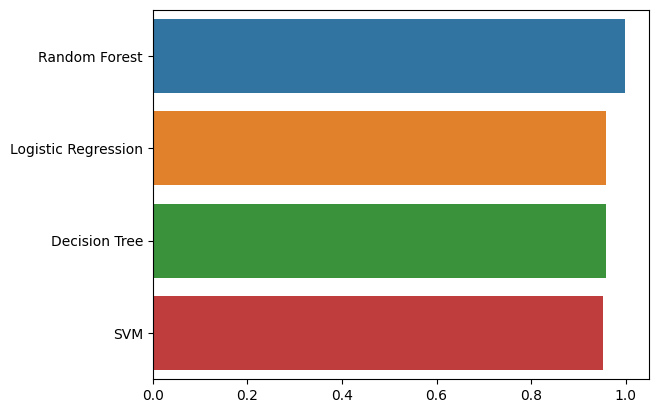

In [53]:
sns.barplot(x=models.Accuracy.sort_values(ascending=False).values,y = models.Accuracy.sort_values(ascending=False).index)



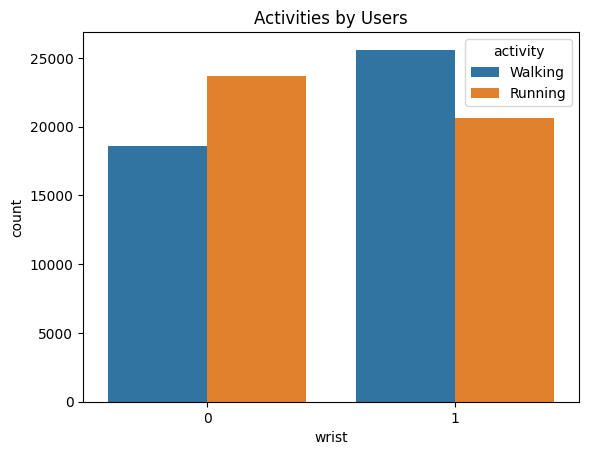

In [59]:
sns.countplot(x = data.wrist,  hue = 'activity', data = df)
plt.title('Activities by Users')
plt.show()

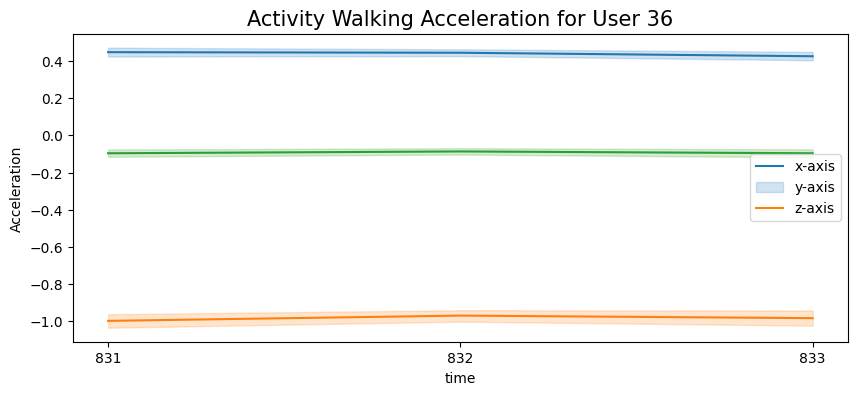

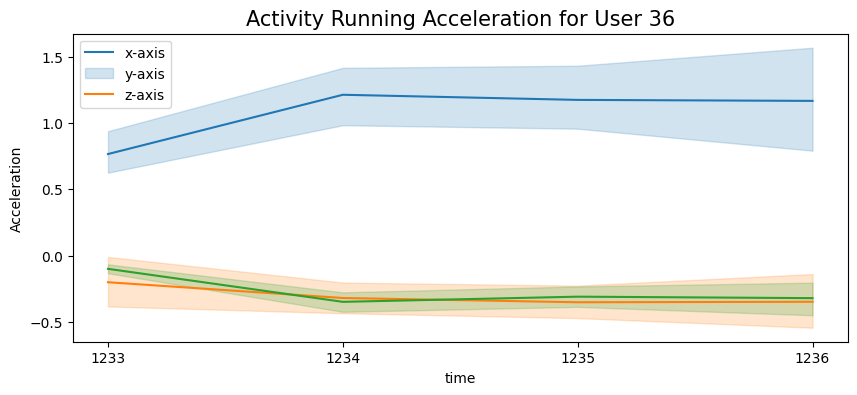

In [63]:
# Get unique activities
unique_activities = df['activity'].unique()

# Loop through each unique activity
for activity in unique_activities:
    data36 = df[df['activity'] == activity][:400]

    # Plot x-axis
    plt.figure(figsize=(10, 4))
    sns.lineplot(y='acceleration_x', x='time', data=data36, label='x-axis')

    # Plot y-axis
    sns.lineplot(y='acceleration_y', x='time', data=data36, label='y-axis')

    # Plot z-axis
    sns.lineplot(y='acceleration_z', x='time', data=data36, label='z-axis')

    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel('Acceleration')
    plt.title(f'Activity {activity} Acceleration for User 36', fontsize=15)
    plt.show()